# Decison Trees

First we'll load some fake data on past hires I made up. Note how we use pandas to convert a csv file into a DataFrame:

In [23]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "D:/VijayWork/Udemy Data science/DataScience-Python3/PastHiresX.csv"

df0 = pd.read_csv(input_file, header = 0)
df1 = df0[df0.columns[range(3,6)]]

df2 = df0[df0.columns[-1]]

#step 3: combine step1 and step2

df=df1.join(df2)

In [24]:
df.head(13)

,Education,Top-tier school,Interned,Hired
0,CS,N,N,N
1,ME,N,N,Y
2,EE,N,N,N
3,AE,Y,N,Y
4,IS,Y,N,N
5,ME,Y,Y,Y
6,CE,N,Y,Y
7,ME,N,Y,Y
8,AE,N,N,Y
9,IS,N,N,Y


scikit-learn needs everything to be numerical for decision trees to work. So, we'll map Y,N to 1,0 and levels of education to some scale of 0-2. In the real world, you'd need to think about how to deal with unexpected or missing data! By using map(), we know we'll get NaN for unexpected values.

In [25]:
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
#df['Top-tier school'] = df['Top-tier school'].map(d)

#d = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4,'5': 5, '7': 6, '10': 7, '15': 8, '20': 9}
df['Interned'] = df['Interned'].map(d)

#d = {'0': 0, '1': 1, '2': 2, '4': 3, '5': 4, '6': 5}
#df['Previous employers'] = df['Previous employers'].map(d)

#df['Interned'] = df['Interned'].map(d)
d = {'CS': 0, 'ME': 1, 'EE': 2, 'AE': 3, 'IS': 4, 'CE': 5, 'MCS': 6, 'MAE': 7, 'MME': 8}
df['Education'] = df['Education'].map(d)
df.head(13)

# in this step we have converted the Y, N value into 1, 0 value. 


# 

,Education,Top-tier school,Interned,Hired
0,0,0,0,0
1,1,0,0,1
2,2,0,0,0
3,3,1,0,1
4,4,1,0,0
5,1,1,1,1
6,5,0,1,1
7,1,0,1,1
8,3,0,0,1
9,4,0,0,1


Next we need to separate the features from the target column that we're trying to bulid a decision tree for.

In [26]:
features = list(df.columns[:3])
features

['Education', 'Top-tier school', 'Interned']

Now actually construct the decision tree:

In [27]:
y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier(min_samples_leaf= 1, min_samples_split = 2)
clf = clf.fit(X,y)
clf


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

... and display it. Note you need to have pydotplus installed for this to work. (!pip install pydotplus)

To read this decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So value = [0. 5.] mean there are 0 "no hires" and 5 "hires" by the tim we get to that point. value = [3. 0.] means 3 no-hires and 0 hires.

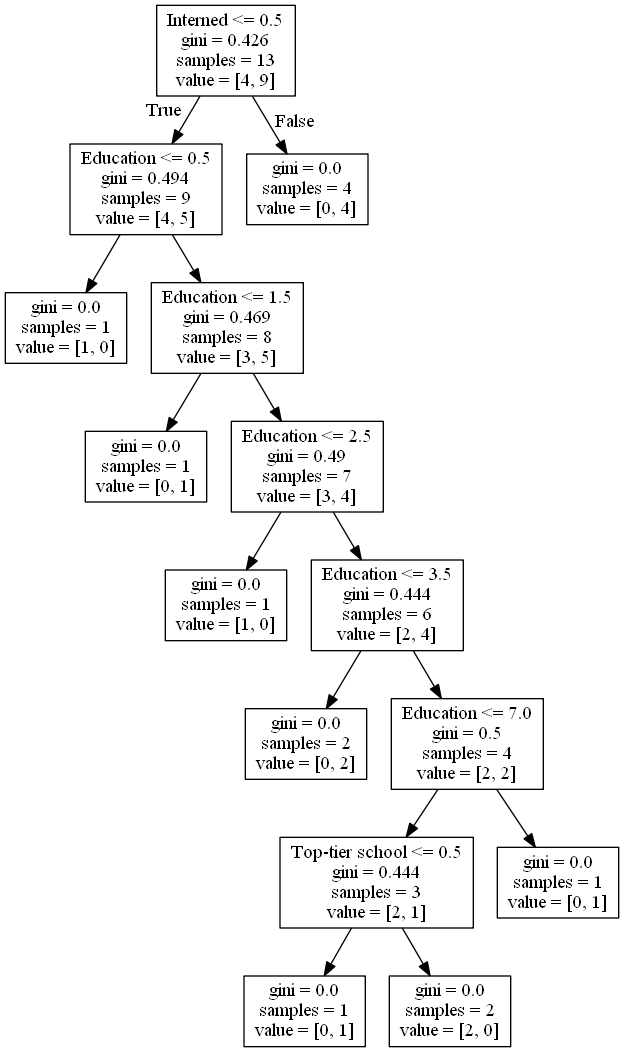

In [28]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  


# Quiz Time! 
#The Question is " Why did the system choose Interned as the root node. Run the exmaple again , may be three or fout times and see 
# if it changes. 

## Ensemble learning: using a random forest

We'll use a random forest of 10 decision trees to predict employment of specific candidate profiles:

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

#Predict employment of an employed 10-year veteran
#print (clf.predict([[10, 1, 4, 0, 0, 0]]))
#...and an unemployed 10-year veteran
#print (clf.predict([[10, 0, 4, 0, 0, 0]]))



#Vijays Experiment

#Predict employment of an employed 10-year veteran
print (clf.predict([[1, 0, 0,]]))
#...and an unemployed 10-year veteran
print (clf.predict([[3, 0, 0]]))

[1]
[1]


## Activity

Modify the test data to create an alternate universe where everyone I hire everyone I normally wouldn't have, and vice versa. Compare the resulting decision tree to the one from the original data.